<h2>Problem Statement:<br>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. </h2>

In [2]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset using pandas
data=pd.read_csv('Company_Data.csv')

## Performing EDA

In [4]:
#displaying  first 5 records 
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [5]:
#displaying last 5 records
data.tail()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes

In [6]:
#shape of dataset
data.shape   

(400, 11)

Dataset has `400` rows and `11` columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### As we can see that from the infomation the dataset having float,int and object datatypes.But Random Forest is classification model algorithm it will only allows categorical data.So, in our case we have target class is sales.So, we are going to convert it into categorical type for further analysis

In [8]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

#### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [9]:
data.ndim

2

In [10]:
data.axes

[RangeIndex(start=0, stop=400, step=1),
 Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
        'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
       dtype='object')]

In [11]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [12]:
new_data=pd.cut(data['Sales'],bins=[0.0,6.0,12.0,18.0],labels=['Low','Medium','High'])
data.insert(0,'Sales_Ratio',new_data)

#### Converting Sales column data into category and storing into new column Sales_Ratio

In [13]:
data.head()

Sales_Ratio  Sales  CompPrice  Income  Advertising  Population  Price  \
0      Medium   9.50        138      73           11         276    120   
1      Medium  11.22        111      48           16         260     83   
2      Medium  10.06        113      35           10         269     80   
3      Medium   7.40        117     100            4         466     97   
4         Low   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No

In [14]:
data.tail()

Sales_Ratio  Sales  CompPrice  Income  Advertising  Population  Price  \
395        High  12.57        138     108           17         203    128   
396      Medium   6.14        139      23            3          37    120   
397      Medium   7.41        162      26           12         368    159   
398         Low   5.94        100      79            7         284     95   
399      Medium   9.71        134      37            0          27    120   

    ShelveLoc  Age  Education Urban   US  
395      Good   33         14   Yes  Yes  
396    Medium   55         11    No  Yes  
397    Medium   40         18   Yes  Yes  
398       Bad   50         12   Yes  Yes  
399      Good   49         16   Yes  Yes

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales_Ratio  399 non-null    category
 1   Sales        400 non-null    float64 
 2   CompPrice    400 non-null    int64   
 3   Income       400 non-null    int64   
 4   Advertising  400 non-null    int64   
 5   Population   400 non-null    int64   
 6   Price        400 non-null    int64   
 7   ShelveLoc    400 non-null    object  
 8   Age          400 non-null    int64   
 9   Education    400 non-null    int64   
 10  Urban        400 non-null    object  
 11  US           400 non-null    object  
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [16]:
data.nunique()

Sales_Ratio      3
Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [17]:
#Checking for missing data
data.isna().sum()

Sales_Ratio    1
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In Sales_Ratio there is one NA vales so will replace it by Mode

In [18]:
sales=data['Sales_Ratio']

In [19]:
data['Sales_Ratio']=sales.fillna(sales.mode().iloc[0])

In [20]:
#removing Sales columne as we wont requires it
data=data.drop(columns='Sales',axis=1,inplace=False)

In [21]:
#checking for NA values
data.isna().sum()

Sales_Ratio    0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

Now there is no any NA value in our dataset

In [22]:
#checking for duplicated values
data[data.duplicated()].shape

(0, 11)

No any record has been duplicated

In [23]:
data['Sales_Ratio'].value_counts()

Medium    244
Low       129
High       27
Name: Sales_Ratio, dtype: int64

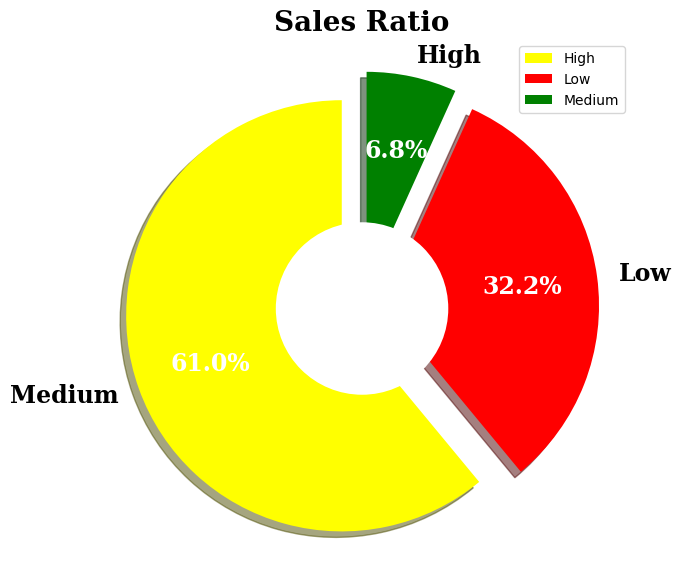

In [24]:
label_data=data['Sales_Ratio'].value_counts()

explode=(0.1,0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['yellow','red','green'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Sales Ratio',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['High','Low','Medium'],loc="upper right")
plt.show()

<h4>Observations:</h4>
Pie graph is clearly showing the highest sales ratio is in mdeium range<br>
The high sales ratio is lowest one with 6% which is too critical in our business<br>
we should work on features which are effecting to in sales ratio<br>
So, we can increase the percentage of high sales ratio

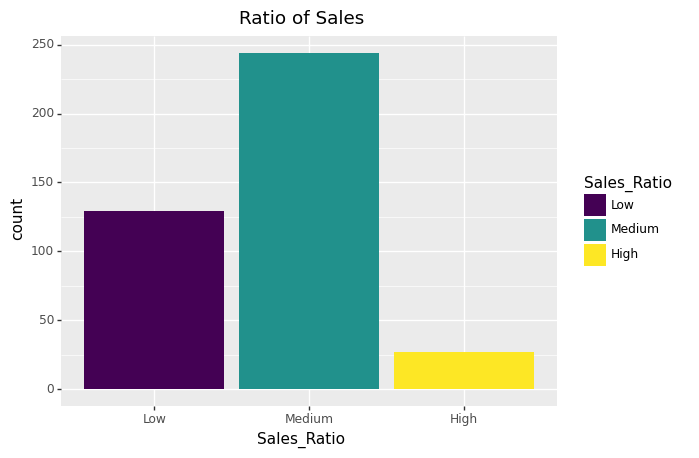

<ggplot: (170023810500)>

In [25]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar, ggtitle

ggplot(data) + aes(x='Sales_Ratio',fill='Sales_Ratio') + ggtitle("Ratio of Sales") + geom_bar()

### Using Bar graph representing Sales Ratio

In [26]:
data.columns

Index(['Sales_Ratio', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [27]:
features = ['Advertising', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

In [28]:
list(enumerate(features))

[(0, 'Advertising'),
 (1, 'ShelveLoc'),
 (2, 'Age'),
 (3, 'Education'),
 (4, 'Urban'),
 (5, 'US')]

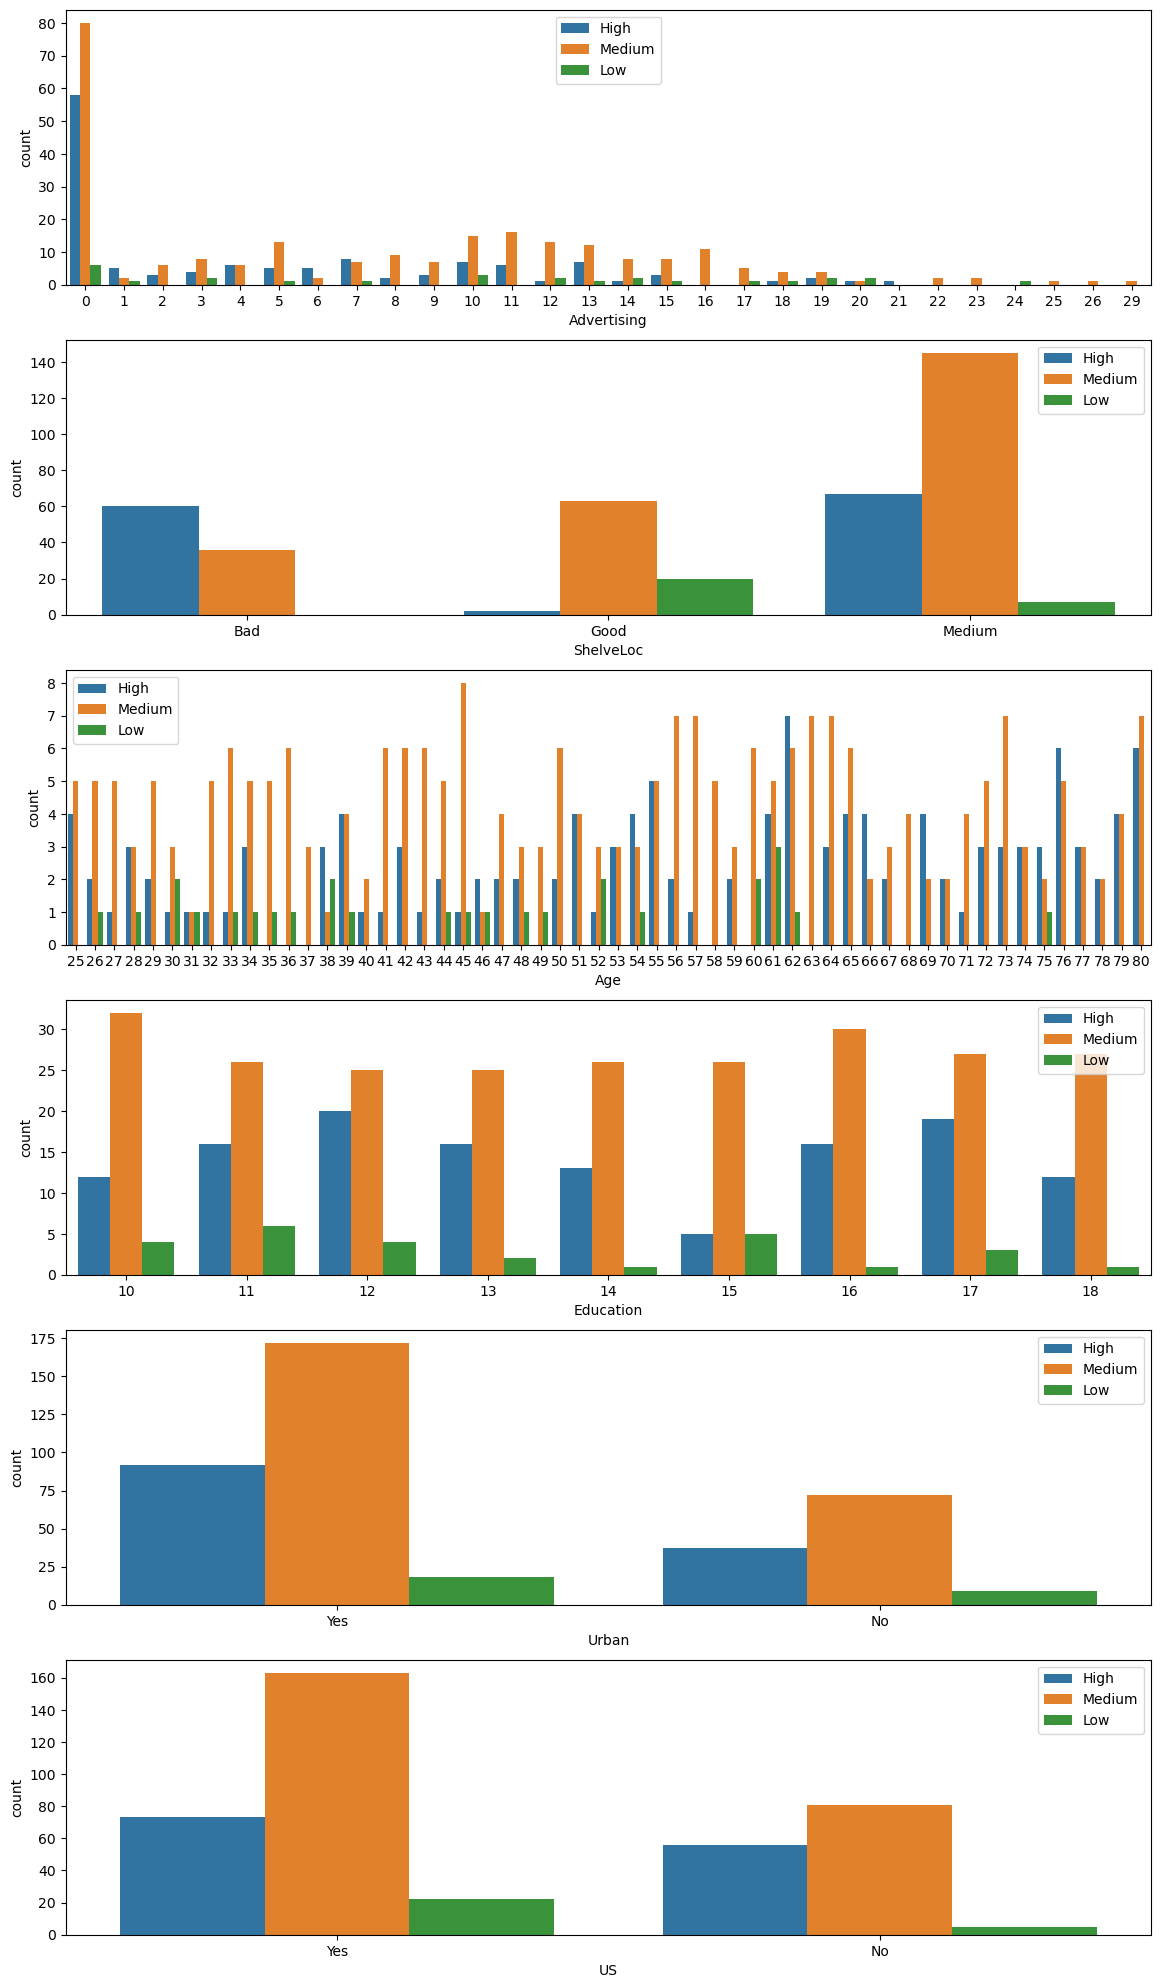

In [29]:
plt.figure(figsize=(14,25))
for i in enumerate(features):
    plt.subplot(6,1,i[0]+1)
    sns.countplot(i[1],hue='Sales_Ratio',data=data)
    plt.legend(["High","Medium","Low"])
plt.show()    

<h4>Observations:</h4>
In Advertising feature 0 advertising has highest high,medium and high sales ratio where 16,22,23,25,26 and 29 has only medium sales ratio we should recheck this advertisings<br>
A medium Shelveloc has good sales ratio compared to other shelveloc<br>
Age between 63 to 80 the sales ratio is very good containing medium and high sales<br>
This age period is important for further analysis <br>
Peoples lives in urban giving quite good result <br>
Peoples lives in US has more sales than the outsiders 

In [30]:
fig = px.bar(data, x='ShelveLoc',title="ShelveLoc Category", width=700,height=700,color="ShelveLoc")
fig.show()

<h4>Observations:</h4>
Medium indicates quality of shelving location has highest count<br>
But we can see that good Shelving location is lesser than others<br>
We should make a changes in the quality of good shelve location 

In [31]:
data.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [32]:
fig = px.bar(data, x='Urban',title="Resident in Urban", width=500,height=500,color="Urban")
fig.show()

<h4>Observations:</h4>
The number of residents who lived in Urban is 282 and non-residents are 118

In [33]:
data.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [34]:
fig = px.bar(data, x='US',title="Resident in US", width=500,height=500,color="US")
fig.show()

<h4>Observations:</h4>
The number of residents who lived in US is 258 and non-residents are 141

In [35]:
continue_cols=['CompPrice', 'Income', 'Advertising', 'Population','Price', 'Age', 'Education']

In [36]:
category_cols=['Sales_Ratio','ShelveLoc', 'Urban', 'US']

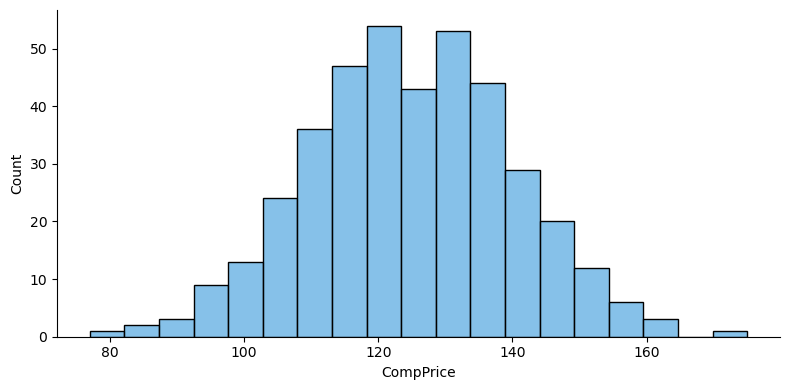

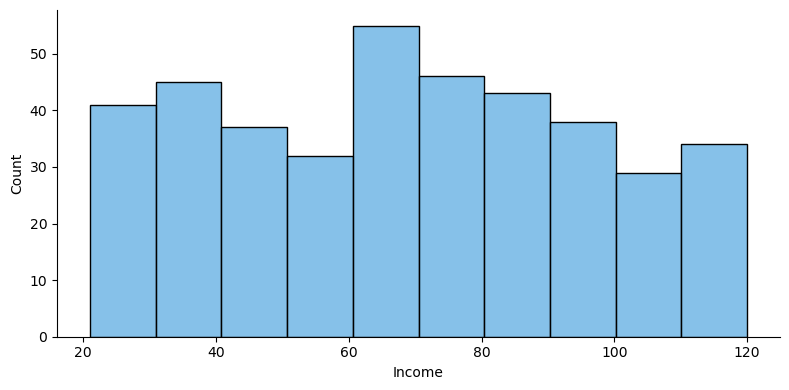

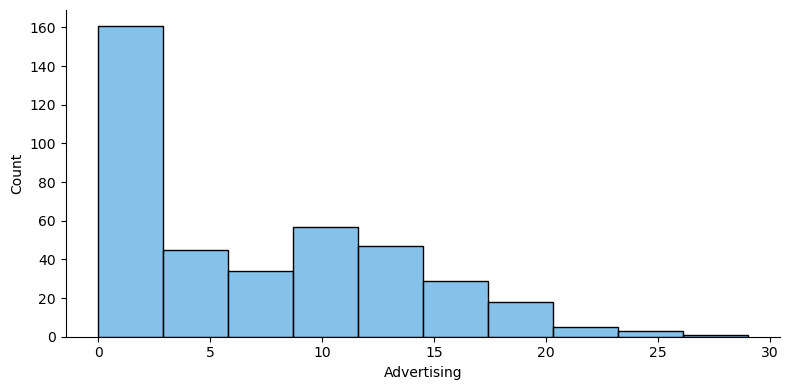

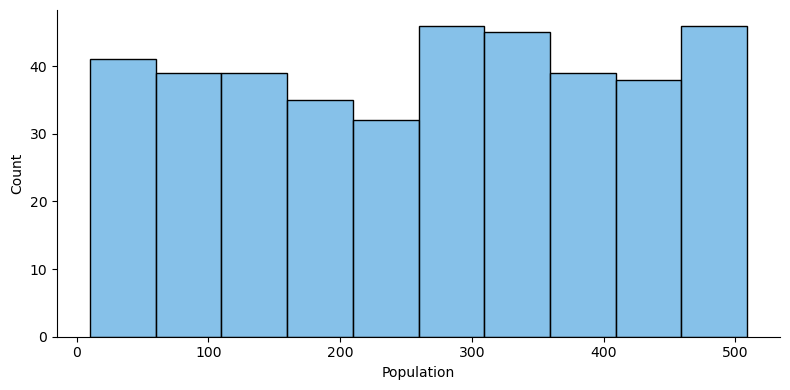

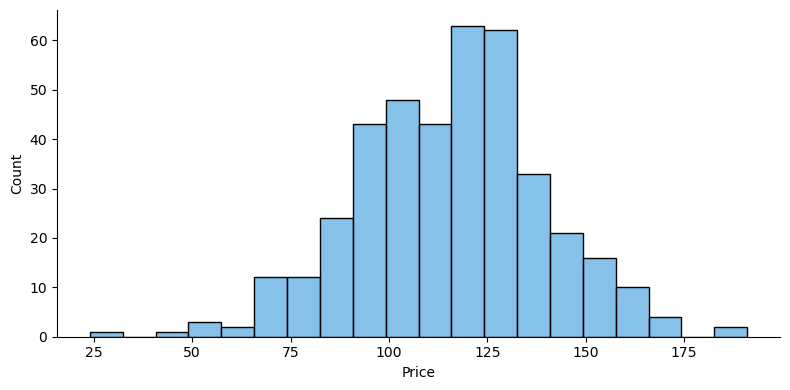

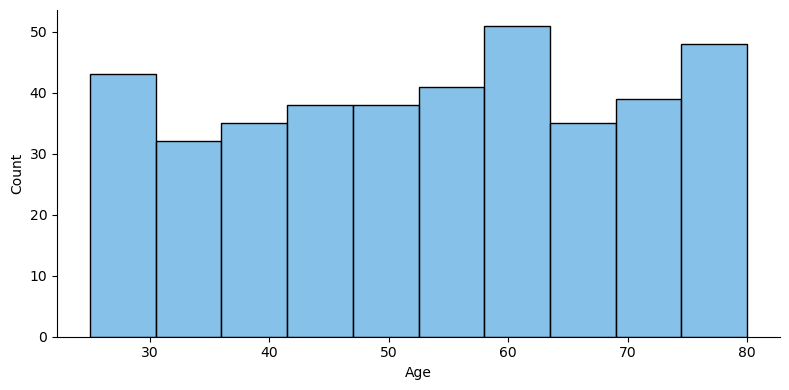

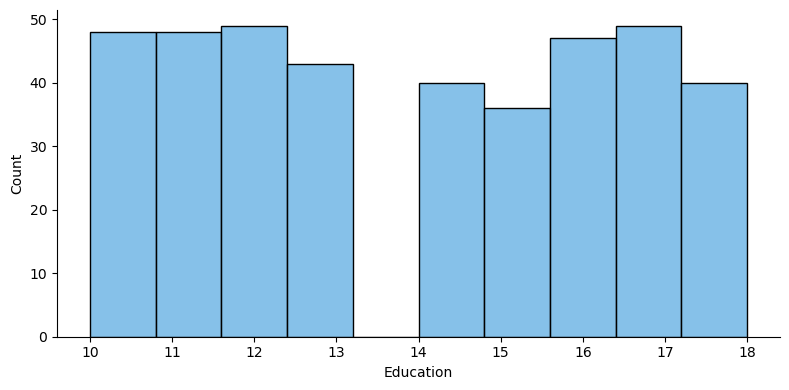

In [37]:
for cols in continue_cols:
    sns.displot(data=data,x=cols,height=4,aspect=2,color='#5DADE2')
plt.show()

<h4>Observations:</h4>
CompPrice is giving normal distribution <br>
Advertising giving positive skewness 

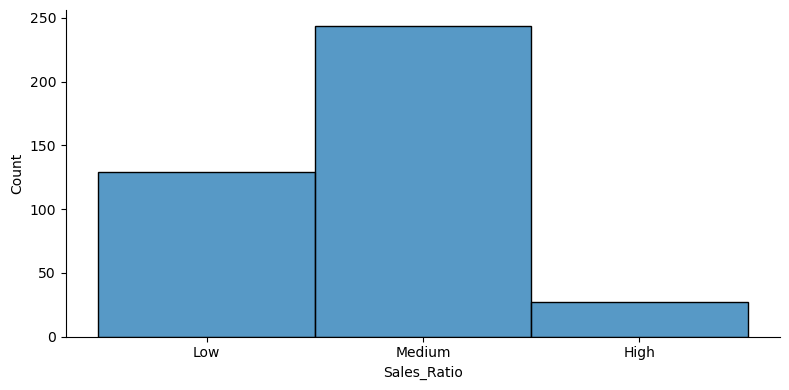

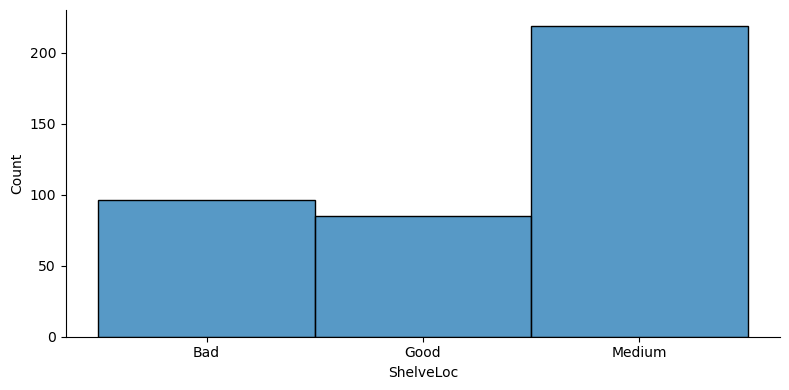

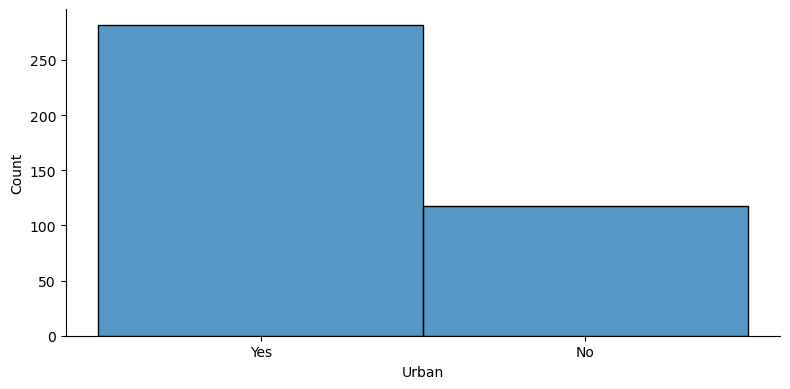

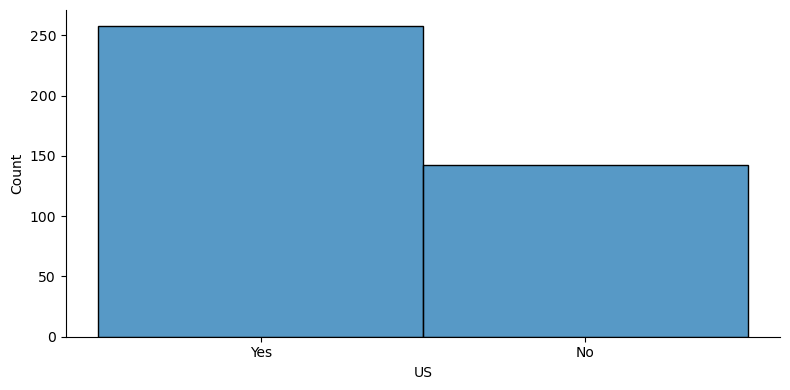

In [38]:
for cols in category_cols:
    sns.displot(data=data,x=cols,height=4,aspect=2,palette='deep')
plt.show()    

In [39]:
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [40]:
#converting data object to integer
data['ShelveLoc']=data['ShelveLoc'].map({'Good':0,'Medium':1,'Bad':2})
data['Sales_Ratio']=data['Sales_Ratio'].map({'High':0,'Medium':1,'Low':2})

### map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [41]:
data.head()

Sales_Ratio  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0           1        138      73           11         276    120          2   
1           1        111      48           16         260     83          0   
2           1        113      35           10         269     80          1   
3           1        117     100            4         466     97          1   
4           2        141      64            3         340    128          2   

   Age  Education  Urban_Yes  US_Yes  
0   42         17          1       1  
1   65         10          1       1  
2   59         12          1       1  
3   55         14          1       1  
4   38         13          1       0

In [42]:
data.tail()

Sales_Ratio  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
395           0        138     108           17         203    128          0   
396           1        139      23            3          37    120          1   
397           1        162      26           12         368    159          1   
398           2        100      79            7         284     95          2   
399           1        134      37            0          27    120          0   

     Age  Education  Urban_Yes  US_Yes  
395   33         14          1       1  
396   55         11          0       1  
397   40         18          1       1  
398   50         12          1       1  
399   49         16          1       1

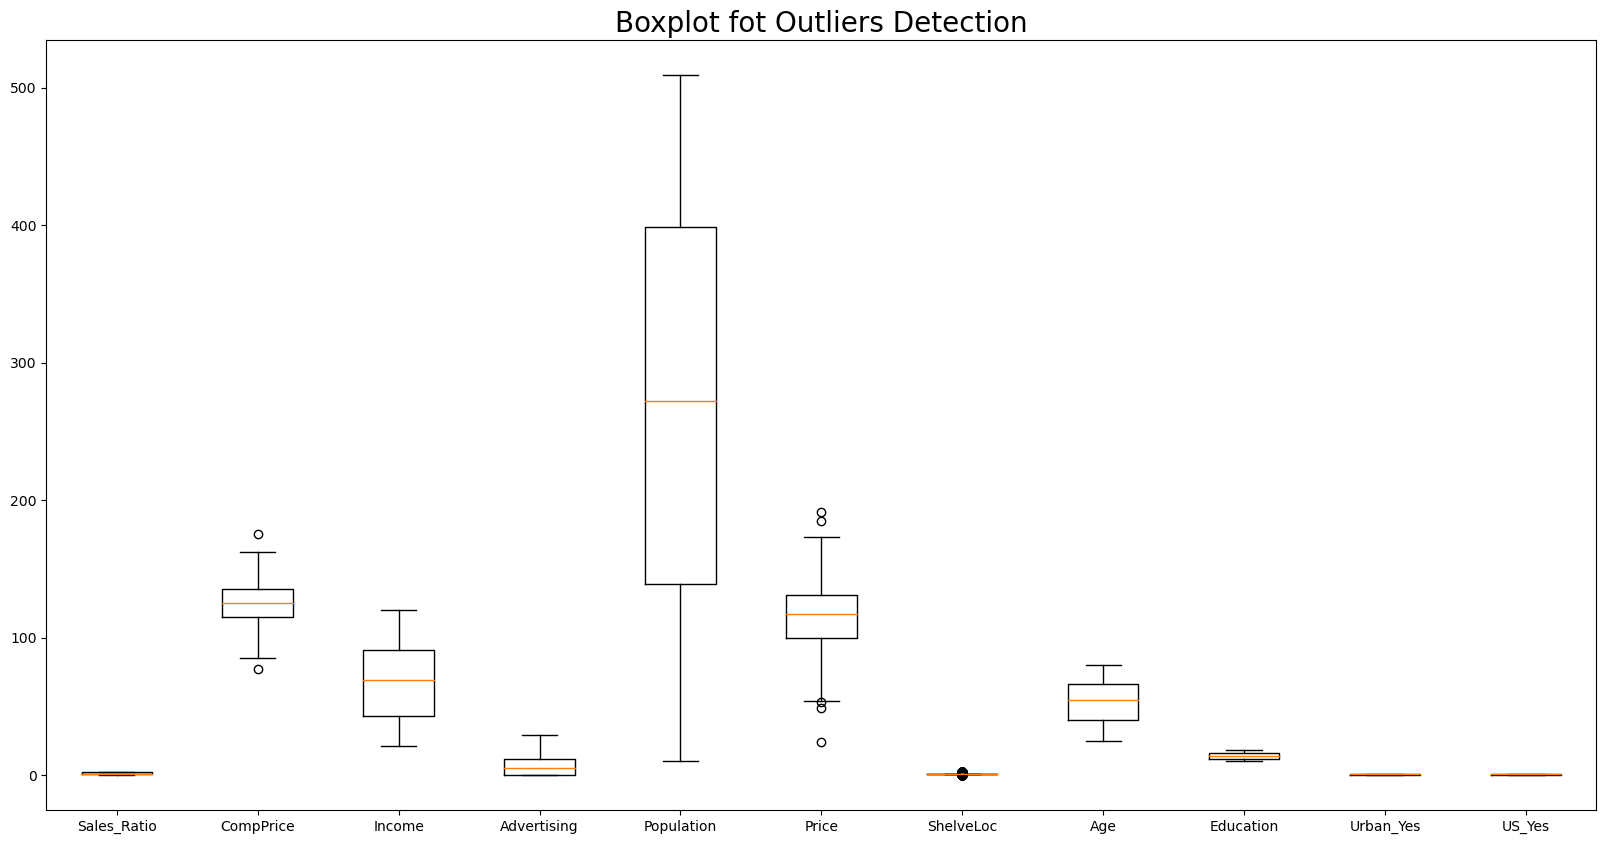

In [43]:
#detecting outliers
plt.figure(figsize=(20,10))
plt.title('Boxplot fot Outliers Detection',fontdict={'fontsize':20})
plt.boxplot(data,labels=['Sales_Ratio', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'])
plt.show()

<h4>Observation :</h4> 
The CompPrice,Price,ShelveLoc has an outliers <br>
Population  has highest mean and high IQR range <br>

In [44]:
data.columns

Index(['Sales_Ratio', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

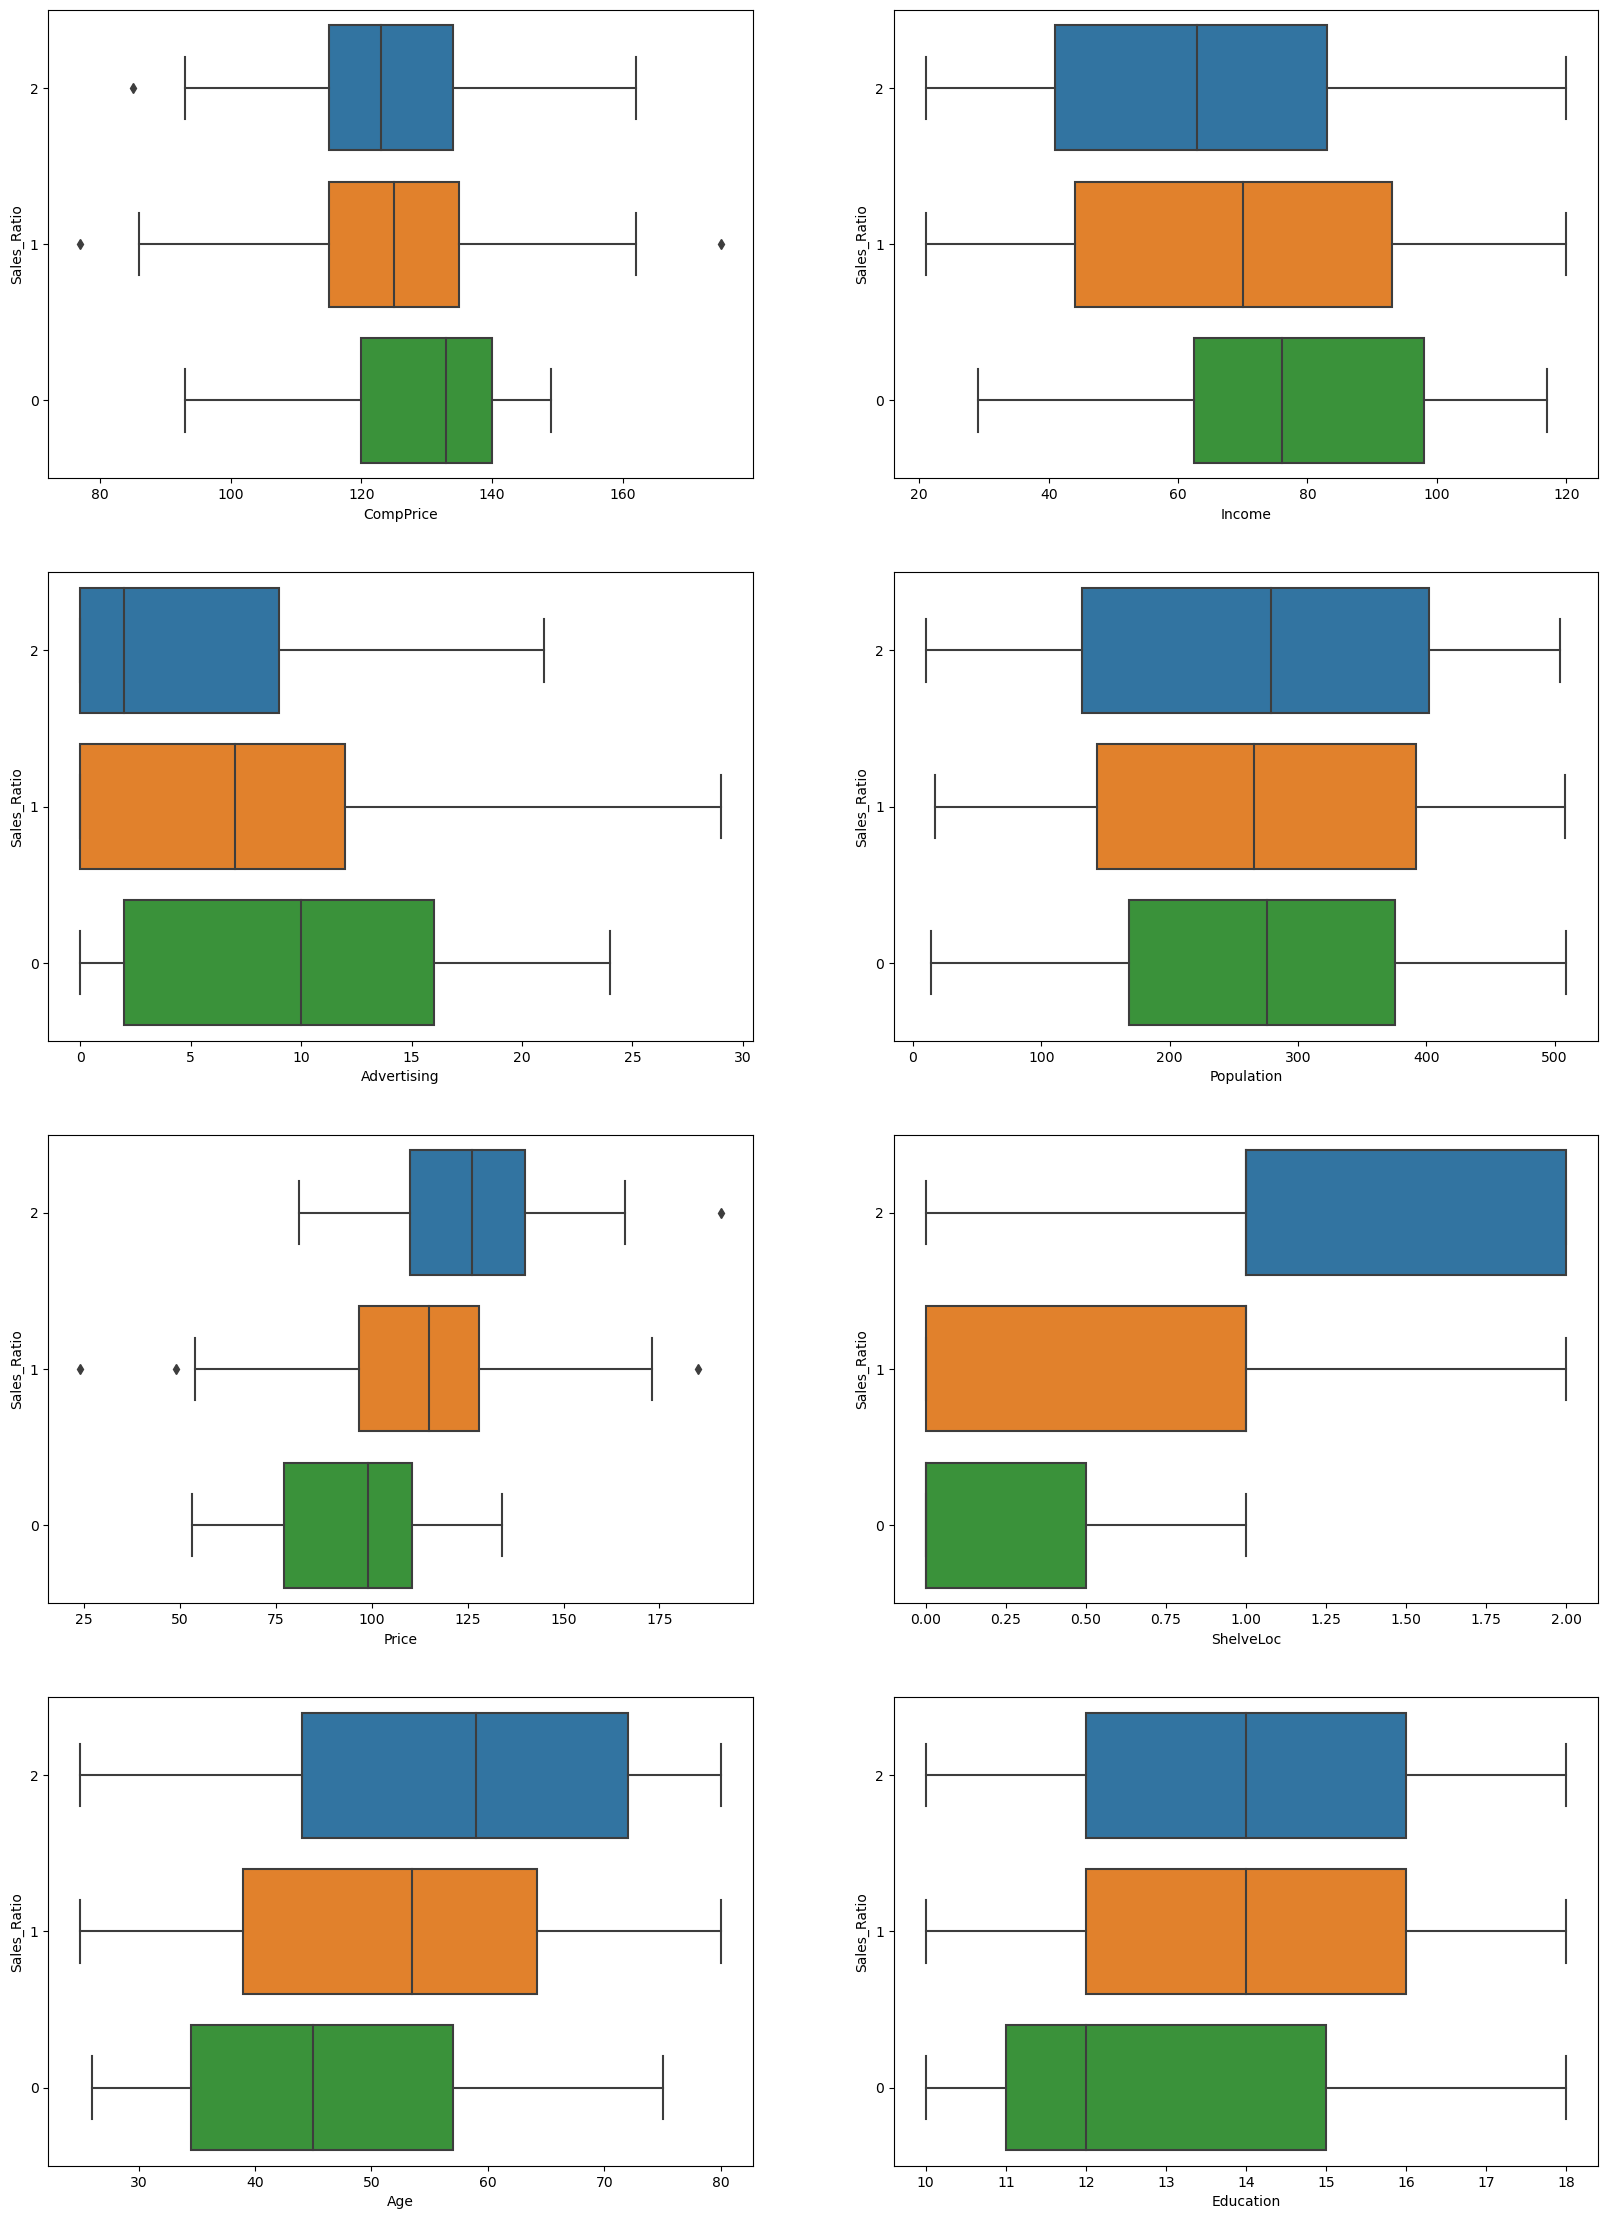

In [45]:
# Boxplot for categorical variables to see demands
vars_cat = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education']
plt.figure(figsize=(20, 28))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='Sales_Ratio')
plt.show()

<h4>Observations:</h4>
The Competitor Price between 120 to 140 has the <b>High</b> sales ratio and high mean is good for selling cloths<br>
while range containing 118 to 136 has low mean and the sales ratio also got decrease<br>
The income having range 63 to 99 has the high mean with this range getting high sales of colths. So, we can assume that those who having Income between this range can get more sales of cloths<br> 
but sales medium and low has more IQR range than high sales so we should look into this so we can give something  discount for increasing ths sale<br>
The advertising range from 2 is good whih high IQR range has good impact on sales ratio as good advertising is getting good sales of colths<br>
If the population small the sales is increasing in demand as population gets increased we can see that their we got sales low<br>
If the price of colths is between 75 to 120 the ratio of sales if high. But, as there price gets high the sales of colths get low.So, we can assume that price should be in good range<br>
As there is good and medium Shelve loation the sales is good but bad shelve location decrease the sales<br>
The peoples having age in 35 to 57 shopping colths ratio is good.But,as the age above 40 slightly sales got decrease.The age is important component for the sales<br>
The peoples who has education  in 11 to 15 the sales ratio is high and good IQR range.

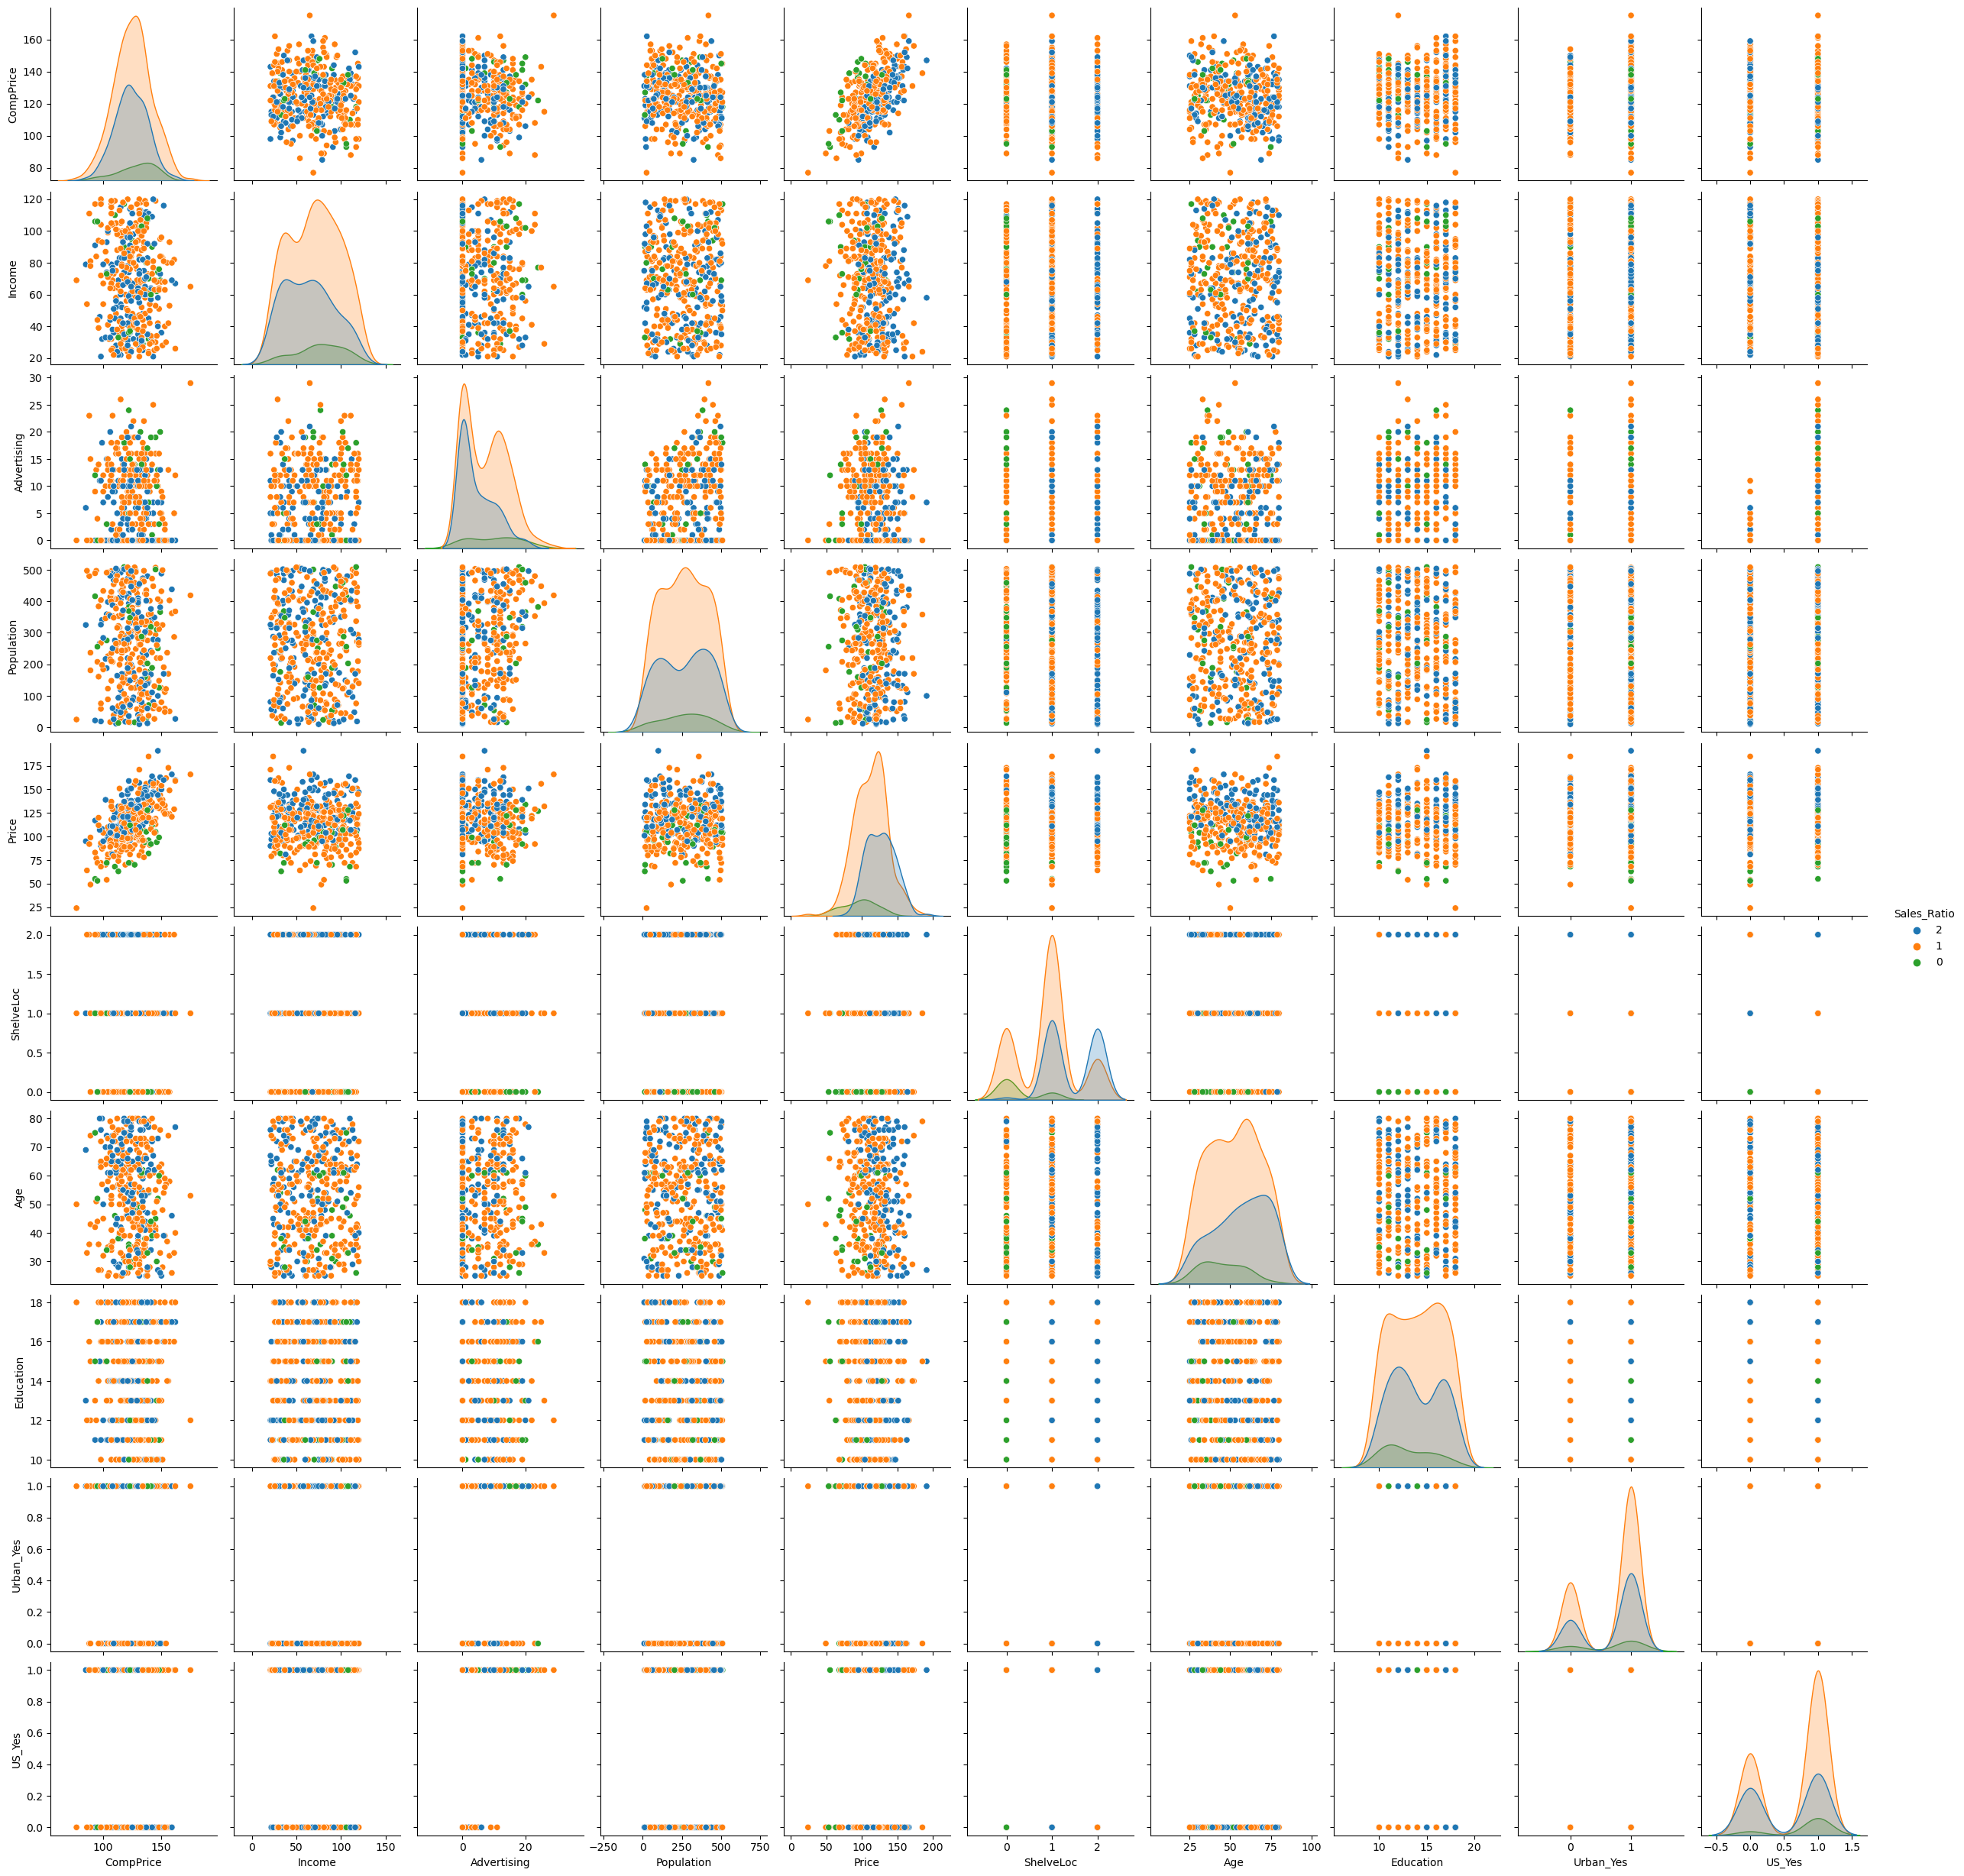

In [46]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'Sales_Ratio')
plt.show()

<h4>Observation:</h4>
    From above graph we can only say that the CompPrice and Price have positive relationship with respect to sales ratio

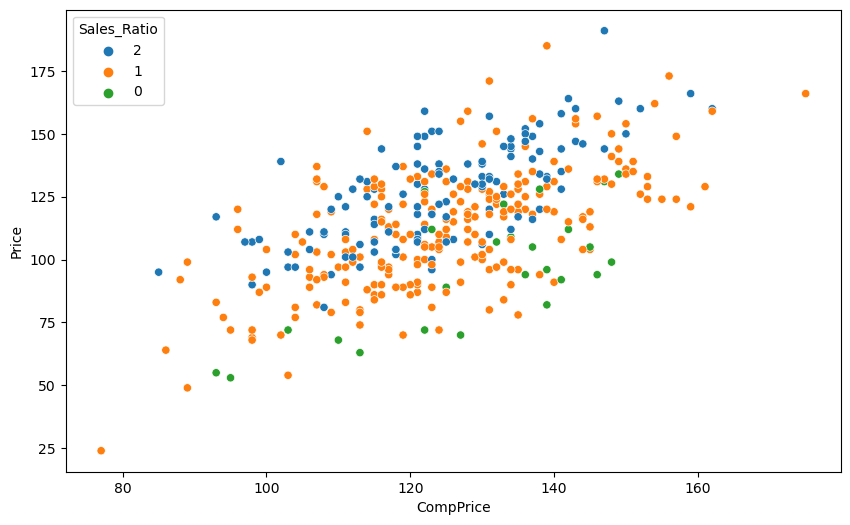

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CompPrice',y='Price' ,data=data,hue='Sales_Ratio')
plt.show()

<h4>Observation:</h4>
    There is a positive skewed has the Price is getting increase the CompPrice also getting increase <br>
    We can see that there is sale in slightly in increasing order

In [48]:
fig = px.scatter(data,x='CompPrice',y='Price',color='Sales_Ratio')
fig.show()

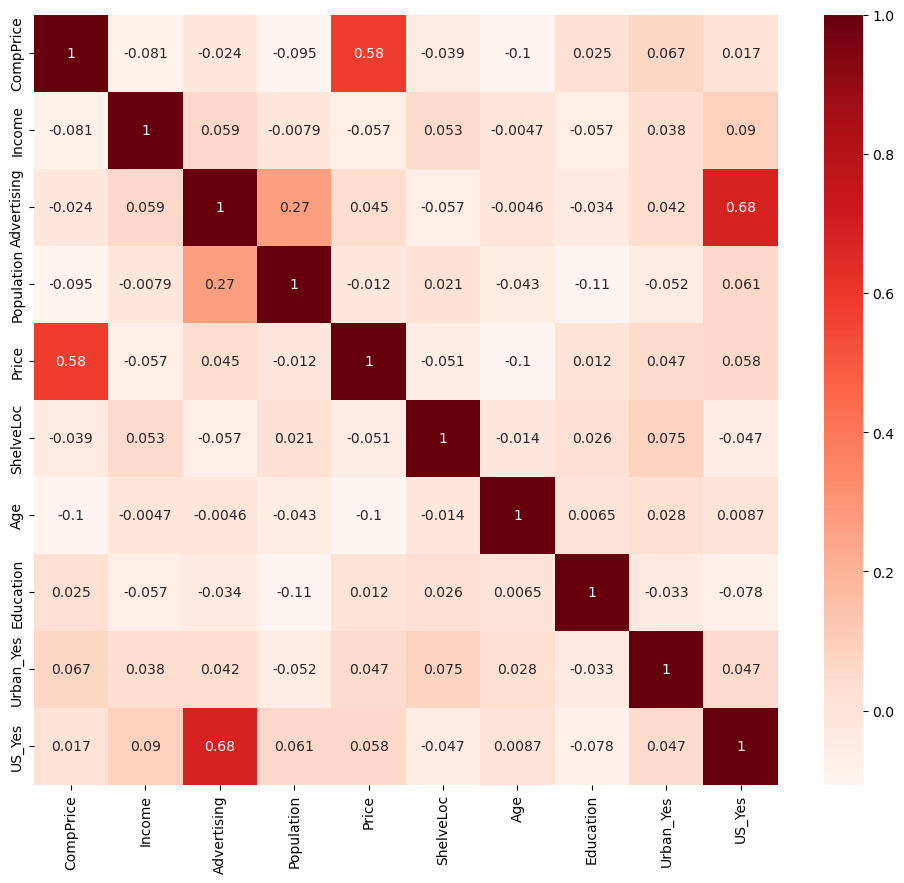

In [49]:
#checking corelation 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h4>Observation:</h4>
    we can see that advertising has a correlation with US_Yes <br>
    Price having correlation with CompPrice
   

## Feature Engineering

### Univariate Feature Selection

In [50]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
array = data.values
X = array[:,0:10]
Y = array[:,0]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [52]:
X

array([[  1, 138,  73, ...,  42,  17,   1],
       [  1, 111,  48, ...,  65,  10,   1],
       [  1, 113,  35, ...,  59,  12,   1],
       ...,
       [  1, 162,  26, ...,  40,  18,   1],
       [  2, 100,  79, ...,  50,  12,   1],
       [  1, 134,  37, ...,  49,  16,   1]], dtype=int64)

In [53]:
Y

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1,

In [54]:
# summarize scores
set_printoptions(precision=3)    #For regression: f_regression, mutual_info_regression
print(fit.scores_)               #For classification: chi2, f_classif, mutual_info_classif
features = fit.transform(X)                             

[1.036e+02 4.150e+00 7.231e+01 1.395e+02 2.664e-01 2.334e+02 4.241e+01
 6.238e+01 1.313e+00 6.852e-02]


### Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [56]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

In [57]:
# Feature Ranking:
fit.ranking_

array([1, 4, 7, 3, 8, 5, 1, 6, 2, 1])

### Feature Importance using Decision Tree

In [58]:
# Feature Importance with Extra Trees Classifier
from sklearn.tree import  DecisionTreeClassifier

In [59]:
# feature extraction
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [60]:
print(model.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h3>By feature engineering we have got the features which are more important and less important.so, we will drop the features which are less important </h3>

In [61]:
data.columns

Index(['Sales_Ratio', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [62]:
data.pop('Urban_Yes')

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban_Yes, Length: 400, dtype: uint8

In [63]:
data.head()

Sales_Ratio  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0           1        138      73           11         276    120          2   
1           1        111      48           16         260     83          0   
2           1        113      35           10         269     80          1   
3           1        117     100            4         466     97          1   
4           2        141      64            3         340    128          2   

   Age  Education  US_Yes  
0   42         17       1  
1   65         10       1  
2   59         12       1  
3   55         14       1  
4   38         13       0

## Building Random Forest Model

### A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning.

In [64]:
# random forest Classification
#importing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [65]:
ms=StandardScaler()
X=pd.DataFrame(ms.fit_transform(X))

In [66]:
X

0         1         2         3         4         5         6  \
0   -0.447317  0.850455  0.155361  0.657177  0.075819  0.177823  1.446917   
1   -0.447317 -0.912484 -0.739060  1.409957 -0.032882 -1.386854 -1.528747   
2   -0.447317 -0.781896 -1.204159  0.506621  0.028262 -1.513719 -0.040915   
3   -0.447317 -0.520720  1.121336 -0.396715  1.366649 -0.794814 -0.040915   
4    1.306867  1.046337 -0.166631 -0.547271  0.510625  0.516132  1.446917   
..        ...       ...       ...       ...       ...       ...       ...   
395 -2.201500  0.850455  1.407551  1.560513 -0.420131  0.516132 -1.528747   
396 -0.447317  0.915749 -1.633482 -0.547271 -1.547909  0.177823 -0.040915   
397 -0.447317  2.417512 -1.526151  0.807733  0.700853  1.827078 -0.040915   
398  1.306867 -1.630719  0.370022  0.054953  0.130170 -0.879391  1.446917   
399 -0.447317  0.589279 -1.132606 -0.998939 -1.615848  0.177823 -1.528747   

            7         8         9  
0   -0.699782  1.184449  0.646869  
1    0.721723 -1.490113  0.646869  
2    0.350895 -0.725953  0.646869  
3    0.103677  0.038208  0.646869  
4   -0.947000 -0.343872  0.646869  
..        ...       ...       ...  
395 -1.256023  0.038208  0.646869  
396  0.103677 -1.108033 -1.545908  
397 -0.823391  1.566529  0.646869  
398 -0.205346 -0.725953  0.646869  
399 -0.267150  0.802369  0.646869  

[400 rows x 10 columns]

In [67]:
Y

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1,

## Model Validation Methods

### Evaluate using Cross Validation

In [68]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [69]:
kfold = KFold(n_splits=10)
kf_model = RandomForestClassifier()
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [70]:
results

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
results.mean()*100.0

100.0

In [72]:
results.std()*100.0

0.0

## RandomForest Classifiers Using criterion GINI

In [73]:
kf_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=4,random_state = 50)
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [74]:
results

array([0.925, 0.975, 1.   , 0.975, 0.95 , 0.975, 0.975, 1.   , 0.95 ,
       0.975])

In [75]:
gini_score=results.mean()*100.0
gini_score

97.0

In [76]:
results.std()*100.0

2.1794494717703365

## RandomForest Classifiers Using criterion Entropy 

In [77]:
kf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth=4,random_state = 50)
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [78]:
results

array([0.95 , 1.   , 1.   , 0.975, 0.95 , 0.975, 0.975, 1.   , 0.975,
       1.   ])

In [79]:
entropy_score=results.mean()*100.0
entropy_score

97.99999999999999

In [80]:
results.std()*100.0

1.8708286933869727

### Evaluate using a train and a test set

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=55)

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 10), (280,), (120, 10), (120,))

## RandomForest Classifiers Using criterion GINI

In [83]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=4,random_state = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=50)

In [84]:
y_pred = rf.predict(X_test)

In [85]:
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 1], dtype=int64)

In [86]:
y_train_pd=rf.predict(X_train)

In [87]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
cm=confusion_matrix(y_test, y_pred)

Accuracy = 98.33333333333333


Text(95.72222222222221, 0.5, 'Truth')

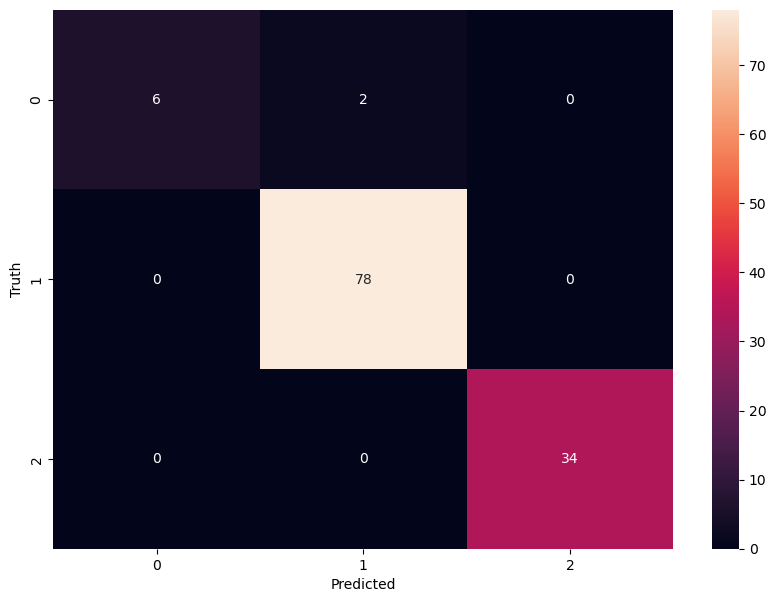

In [88]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.97      1.00      0.99        78
           2       1.00      1.00      1.00        34

    accuracy                           0.98       120
   macro avg       0.99      0.92      0.95       120
weighted avg       0.98      0.98      0.98       120



## Checking for overfitting and underfitting

In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.9964
Test set score: 0.9833


The training-set accuracy score is `0.9964` while the test-set accuracy to be `0.9833`. These two values are quite comparable. So, there is no sign of overfitting

## RandomForest Classifiers Using criterion Entropy

In [91]:
rf1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth=4,random_state = 50)
rf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=50)

In [92]:
y_pred = rf1.predict(X_test)

In [93]:
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 1], dtype=int64)

In [94]:
y_train_pd=rf1.predict(X_train)

In [95]:
acc1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
cm=confusion_matrix(y_test, y_pred)

Accuracy = 98.33333333333333


Text(95.72222222222221, 0.5, 'Truth')

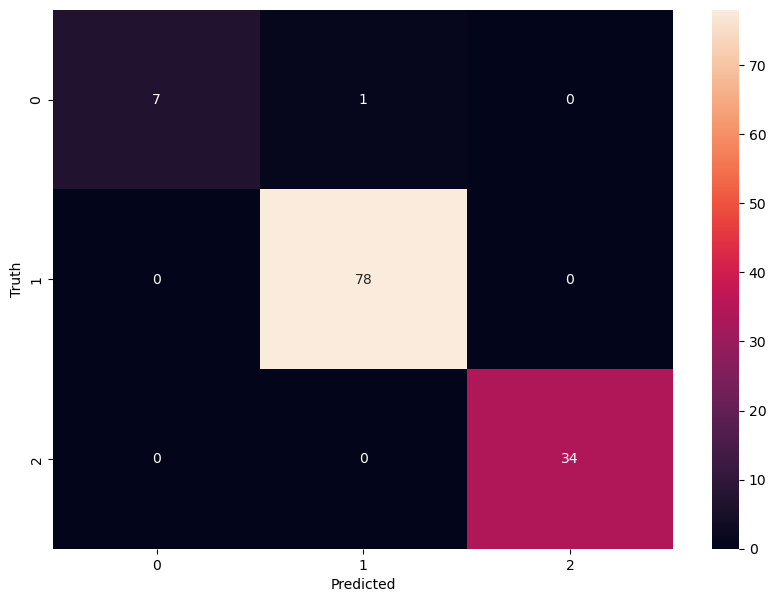

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.99      1.00      0.99        78
           2       1.00      1.00      1.00        34

    accuracy                           0.99       120
   macro avg       1.00      0.96      0.98       120
weighted avg       0.99      0.99      0.99       120



## Checking for overfitting and underfitting

In [98]:
# Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf1.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9917


The training-set accuracy score is `1.0000` while the test-set accuracy to be `0.9917`. These two values are quite comparable. So, there is no sign of overfitting

## Building Random Forest Model using XGBM and LGBM

### GBMs are powerful machine learning models that have been shown to outperform many other types of models, including deep neural networks, in a variety of tasks. LightGBM uses a novel technique called histogram-based binning, allowing it to learn from data more efficiently than traditional GBMs.

In [99]:
# !pip install xgboost
# !pip install lightgbm

In [100]:
# First XGBoost model for Company dataset
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [101]:
# fit model no training data
xgb_model = XGBClassifier(n_estimators=500,learning_rate=1, subsample= 1,min_child_weight=20)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [102]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [103]:
# evaluate predictions
accuracy = (accuracy_score(y_test, predictions)*100)

In [104]:
print("Accuracy: %.2f%%" % (accuracy))

Accuracy: 93.33%


In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      1.00      0.95        78
           2       1.00      1.00      1.00        34

    accuracy                           0.93       120
   macro avg       0.64      0.67      0.65       120
weighted avg       0.87      0.93      0.90       120



In [106]:
# Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xgb_model.score(X_test, y_test)))

Training set score: 0.9357
Test set score: 0.9333


The training-set accuracy score is `0.9357` while the test-set accuracy to be `0.9333`. These two values are quite comparable. So, there is no sign of overfitting

## Checking accuracy with SMOTE

In [140]:
# !pip install imblearn

In [141]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [142]:

xgb_model.fit(X_train_res, y_train_res.ravel())
predictions = xgb_model.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [112]:
# second LGBM model for Company dataset
import lightgbm as lgb

In [113]:
d_train = lgb.Dataset(X_train, label=y_train) # here lightgtm uses native method dataset

In [114]:
d_train

In [115]:
params = {} # here is list of parameters to control regularisation
params['learning_rate'] = 0.2
params['max_depth'] = 4
params['metric'] = 'binary_logloss'
params['boosting_type'] = 'gbdt'
params['num_iterations'] = 5000
params['num_leaves'] = 100

In [116]:
params

{'learning_rate': 0.2,
 'max_depth': 4,
 'metric': 'binary_logloss',
 'boosting_type': 'gbdt',
 'num_iterations': 5000,
 'num_leaves': 100}

In [117]:
lgb_model = lgb.train(params, d_train, 100) # no of trees wants to build

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 10
[LightGBM] [Info] Start training from score 1.271429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [118]:
#Prediction for test data
y_pred = lgb_model.predict(X_test)

In [119]:
predictions = [round(value) for value in y_pred]

In [120]:
accuracy1 = (accuracy_score(y_test, predictions)*100)

In [121]:
print("Accuracy: %.2f%%" % (accuracy1))

Accuracy: 97.50%


In [122]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.97      0.99      0.98        78
           2       1.00      1.00      1.00        34

    accuracy                           0.97       120
   macro avg       0.94      0.91      0.93       120
weighted avg       0.97      0.97      0.97       120



In [123]:
#Prediction for train data
y_pred_train = lgb_model.predict(X_train)

In [124]:
predictions = [round(value) for value in y_pred_train]

In [125]:
accuracy2 = (accuracy_score(y_train, predictions)*100)

In [126]:
print("Accuracy: %.2f%%" % (accuracy2))

Accuracy: 100.00%


In [127]:
# Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score:', round(accuracy2,2))
print('Test set score:', round(accuracy1,2))

Training set score: 100.0
Test set score: 97.5


The training-set accuracy score is `100.0` while the test-set accuracy to be `97.5`. These two values are quite comparable. So, there is no sign of overfitting

In [128]:
data = {"MODELS":pd.Series(["KFold Gini Score","KFold Entropy Score","Train-Test Gini Score","Train-Test Entropy Score",
                            "XGBM Model Score","LGBM Model Score"]),
        "Accuracy":pd.Series([gini_score,entropy_score,acc,acc1,accuracy,accuracy1])}
acc_table=pd.DataFrame(data)
acc_table.sort_values(['Accuracy'],ascending=False)

MODELS   Accuracy
3  Train-Test Entropy Score  99.166667
2     Train-Test Gini Score  98.333333
1       KFold Entropy Score  98.000000
5          LGBM Model Score  97.500000
0          KFold Gini Score  97.000000
4          XGBM Model Score  93.333333

<h3>Insights:</h3>
<br>
We have build a classification model using Random Forest algorithms for a cloth manufacturing company who is interested to know about the segment or attributes causes high sale <br>
we have used model validation techniques, feature engineering<br>
In random forest algorithm we measured score using GINI and ENTROPY methods<br>
The segments which causes to high scale are <b>Competitor Price, Advertising, Age, Education</b><br>
we should focus on segments like <b>Price, Shelf Location at stores, Population</b> to increse the colth sales <br>
So, we see that the Train-Test model validation techniques gives good accuracy than KFold meathod<br>
The model with criterion <b>entropy</b> gives more accuracy rather than criterion <b>gini</b> index<br>
The training-set accuracy score is <b>100%</b> while the test-set accuracy to be <b>99%</b>. These two values are quite comparable. So, there is no sign of overfitting
So, model with criterion <b>Entropy</b> is Generalized(Best fitted).
